# 1. IMPORT THƯ VIỆN

In [24]:
import requests
from bs4 import BeautifulSoup
import os
import csv
from concurrent.futures import ThreadPoolExecutor
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

# 2. CRAWL DỮ LIỆU

## 2.1 Crawl điểm thi THPTQG [2018 - 2023] 

In [2]:
ID_TO_PROVINCE_DICTIONARY = {
    '01': 'Thành phố Hà Nội',
    '02': 'Thành phố Hồ Chí Minh',
    '03': 'Thành phố Hải Phòng',
    '04': 'Thành phố Đà Nẵng',
    '05': 'Tỉnh Hà Giang',
    '06': 'Tỉnh Cao Bằng',
    '07': 'Tỉnh Lai Châu',
    '08': 'Tỉnh Lào Cai',
    '09': 'Tỉnh Tuyên Quang',
    '10': 'Lạng Sơn',
    '11': 'Tỉnh Bắc Kạn',
    '12': 'Tỉnh Thái Nguyên',
    '13': 'Tỉnh Yên Bái',
    '14': 'Tỉnh Sơn La',
    '15': 'Tỉnh Phú Thọ',
    '16': 'Tỉnh Vĩnh Phúc',
    '17': 'Tỉnh Quảng Ninh',
    '18': 'Tỉnh Bắc Giang',
    '19': 'Tỉnh Bắc Ninh',
    '21': 'Tỉnh Hải Dương',
    '22': 'Tỉnh Hưng Yên',
    '23': 'Tỉnh Hòa Bình',
    '24': 'Tỉnh Hà Nam',
    '25': 'Tỉnh Nam Định',
    '26': 'Tỉnh Thái Bình',
    '27': 'Tỉnh Ninh Bình',
    '28': 'Tỉnh Thanh Hóa',
    '29': 'Tỉnh Nghệ An',
    '30': 'Tỉnh Hà Tĩnh',
    '31': 'Tỉnh Quảng Bình',
    '32': 'Tỉnh Quảng Trị',
    '33': 'Tỉnh Thừa Thiên - Huế',
    '34': 'Tỉnh Quảng Nam',
    '35': 'Tỉnh Quảng Ngãi',
    '36': 'Tỉnh Kon Tum',
    '37': 'Tỉnh Bình Định',
    '38': 'Tỉnh Gia Lai',
    '39': 'Tỉnh Phú Yên',
    '40': 'Tỉnh Đắk Lắk',
    '41': 'Tỉnh Khánh Hòa',
    '42': 'Tỉnh Lâm Đồng',
    '43': 'Tỉnh Bình Phước',
    '44': 'Tỉnh Bình Dương',
    '45': 'Tỉnh Ninh Thuận',
    '46': 'Tỉnh Tây Ninh',
    '47': 'Tỉnh Bình Thuận',
    '48': 'Tỉnh Đồng Nai',
    '49': 'Tỉnh Long An',
    '50': 'Tỉnh Đồng Tháp',
    '51': 'Tỉnh An Giang',
    '52': 'Tỉnh Bà Rịa - Vũng Tàu',
    '53': 'Tỉnh Tiền Giang',
    '54': 'Tỉnh Kiên Giang',
    '55': 'Thành phố Cần Thơ',
    '56': 'Tỉnh Bến Tre',
    '57': 'Tỉnh Vĩnh Long',
    '58': 'Tỉnh Trà Vinh',
    '59': 'Tỉnh Sóc Trăng',
    '60': 'Tỉnh Bạc Liêu',
    '61': 'Tỉnh Cà Mau',
    '62': 'Tỉnh Điện Biên',
    '63': 'Tỉnh Đắk Nông',
    '64': 'Tỉnh Hậu Giang'
}

In [ ]:
# bị lỗi HTTPS
PROVINCE_TO_ID_DICTIONARY = {province_name: province_id for province_id, province_name in ID_TO_PROVINCE_DICTIONARY.items()}

PROVINCE_LIST = list(ID_TO_PROVINCE_DICTIONARY.values())
YEARS = [2018, 2019, 2020, 2021, 2022, 2023]
CRAWL_FIELDS = ["Toán", "Ngữ văn", "Ngoại ngữ"]

def process_province(year_province):
    year, province = year_province
    student_count = 0
    for student_id in range(1, 10000):
        identification_number = PROVINCE_TO_ID_DICTIONARY[province] + '0' * (6 - len(str(student_id))) + str(student_id)
        url = f"https://diemthi.vnanet.vn/Home/SearchBySobaodanh?code={identification_number}&nam={year}"
        response = requests.get(url)
        data = response.json()
        print('aa')
        if "result" in data and len(data["result"]) > 0:
            print('bb')
            result = data["result"][0]
            diem_toan = float(result.get("Toan", 0)) if result.get("Toan", "") != "" else 0
            diem_ngu_van = float(result.get("NguVan", 0)) if result.get("NguVan", "") != "" else 0
            diem_ngoai_ngu = float(result.get("NgoaiNgu", 0)) if result.get("NgoaiNgu", "") != "" else 0
            diem_trung_binh = (diem_toan + diem_ngu_van + diem_ngoai_ngu) / 3
            sbd = result.get("Code", "Không có thông tin")
            print(f"SBD: {sbd} Điểm toán: {diem_toan} Điểm văn: {diem_ngu_van} Điểm ngoại ngữ: {diem_ngoai_ngu}")
            student_count += 1
            if student_count == 1000:
                break



for year in YEARS:
    for province in PROVINCE_LIST:
        process_province((year, province))

print("Đã tạo các tệp CSV thành công!")


## 2.2 Crawl data Dân số và mật độ dân số [2018 - 2022]

In [4]:
url = "https://pxweb.gso.gov.vn/pxweb/vi/D%c3%a2n%20s%e1%bb%91%20v%c3%a0%20lao%20%c4%91%e1%bb%99ng/D%c3%a2n%20s%e1%bb%91%20v%c3%a0%20lao%20%c4%91%e1%bb%99ng/V02.01.px/table/tableViewLayout1/?rxid=e6ed7618-f55b-49fd-a76b-5e7d2dee73e3"

# Khởi tạo trình duyệt
driver = webdriver.Chrome()  # Cần cài đặt Chrome WebDriver và thay đổi đường dẫn nếu cần thiết

# Mở trang web
driver.get(url)

# Chờ cho phần tử chứa dữ liệu được hiển thị trên trang (ví dụ: phần tử table)
try:
    element = WebDriverWait(driver, 100).until(
        EC.presence_of_element_located((By.TAG_NAME, "table"))
    )
    # Nếu phần tử được tìm thấy, lấy HTML của trang
    html_content = driver.page_source

    # Sử dụng BeautifulSoup để phân tích HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Tìm tất cả các thẻ table trong HTML
    tables = soup.find_all("table")

    # In ra dữ liệu bảng HTML
    for table in tables:
        print(table.prettify())

except Exception as e:
    print("Không tìm thấy phần tử chứa dữ liệu trên trang sau khi đã lọc.")
    print(e)

# Đóng trình duyệt
driver.quit()


<table class="px_setting_radiobuttonlist" id="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption">
 <tbody>
  <tr>
   <td>
    <input checked="checked" id="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption_0" name="ctl00$ctl00$ContentPlaceHolderMain$cphSettings$rblZeroOption" type="radio" value="ShowAll"/>
    <label for="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption_0">
     Show all rows
    </label>
   </td>
  </tr>
  <tr>
   <td>
    <input id="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption_1" name="ctl00$ctl00$ContentPlaceHolderMain$cphSettings$rblZeroOption" type="radio" value="NoZero"/>
    <label for="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption_1">
     Hide rows with only zeros
    </label>
   </td>
  </tr>
  <tr>
   <td>
    <input id="ctl00_ctl00_ContentPlaceHolderMain_cphSettings_rblZeroOption_2" name="ctl00$ctl00$ContentPlaceHolderMain$cphSettings$rblZeroOption" type="radio" value="NoZeroAndNil"/>
    <labe

![Hình ảnh lấy dữ liệu mật độ dân số và dân số trung bình](assets/density_and_population.jpg)

![Hình ảnh lấy dữ liệu mật độ dân số và dân số trung bình](assets/density_and_population2.jpg)

In [5]:
url = "https://pxweb.gso.gov.vn/pxweb/vi/D%c3%a2n%20s%e1%bb%91%20v%c3%a0%20lao%20%c4%91%e1%bb%99ng/D%c3%a2n%20s%e1%bb%91%20v%c3%a0%20lao%20%c4%91%e1%bb%99ng/V02.01.px/table/tableViewLayout1/?rxid=e6ed7618-f55b-49fd-a76b-5e7d2dee73e3"

# Khởi tạo trình duyệt
driver = webdriver.Chrome()  # Cần cài đặt Chrome WebDriver và thay đổi đường dẫn nếu cần thiết

# Mở trang web
driver.get(url)
data_of_provinces = {}
# Chờ cho phần tử chứa dữ liệu được hiển thị trên trang (ví dụ: phần tử table)
try:
    element = WebDriverWait(driver, 100).until(
        EC.presence_of_element_located((By.TAG_NAME, "table"))
    )
    # Nếu phần tử được tìm thấy, lấy HTML của trang
    html_content = driver.page_source

    # Sử dụng BeautifulSoup để phân tích HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Tìm tất cả các thẻ table trong HTML
    tables = soup.find_all("th", class_="layout1-table-stub layout1-table-stub1")

    # In ra dữ liệu bảng HTML
    for table in tables:
        # In ra tên của tỉnh
        province_name = table.text.strip()
        print("Tỉnh:", province_name)

        # Tìm hàng mẹ của thẻ <th> hiện tại
        parent_row = table.find_parent("tr")
        data_of_provinces[province_name] = []
        # Tìm tất cả các ô dữ liệu (<td>) trong hàng mẹ
        row_data = parent_row.find_all("td", class_="table-data-filled")
        
        # Duyệt qua từng ô dữ liệu
        for data in row_data:
            print("Dữ liệu:", data.text.strip())  # In ra nội dung của ô dữ liệu
            data_of_provinces[province_name].append(data.text.strip())
        print()  # In ra dòng trống để phân tách giữa các tỉnh

except Exception as e:
    print("Không tìm thấy phần tử chứa dữ liệu trên trang sau khi đã lọc.")
    print(e)

# Đóng trình duyệt
driver.quit()


Tỉnh: Hà Nội
Dữ liệu: 7.914,50
Dữ liệu: 2.356,49
Dữ liệu: 8.093,90
Dữ liệu: 2.410,00
Dữ liệu: 8.246,54
Dữ liệu: 2.454,00
Dữ liệu: 8.330,83
Dữ liệu: 2.480,00
Dữ liệu: 8.435,65
Dữ liệu: 2.511,00

Tỉnh: Vĩnh Phúc
Dữ liệu: 1.138,40
Dữ liệu: 921,63
Dữ liệu: 1.154,80
Dữ liệu: 934,00
Dữ liệu: 1.171,20
Dữ liệu: 948,00
Dữ liệu: 1.191,78
Dữ liệu: 964,00
Dữ liệu: 1.197,62
Dữ liệu: 969,00

Tỉnh: Bắc Ninh
Dữ liệu: 1.337,30
Dữ liệu: 1.625,50
Dữ liệu: 1.378,60
Dữ liệu: 1.676,00
Dữ liệu: 1.419,13
Dữ liệu: 1.725,00
Dữ liệu: 1.462,95
Dữ liệu: 1.778,00
Dữ liệu: 1.488,20
Dữ liệu: 1.809,00

Tỉnh: Quảng Ninh
Dữ liệu: 1.303,90
Dữ liệu: 211,05
Dữ liệu: 1.324,80
Dữ liệu: 214,00
Dữ liệu: 1.337,61
Dữ liệu: 216,00
Dữ liệu: 1.350,85
Dữ liệu: 218,00
Dữ liệu: 1.362,88
Dữ liệu: 220,00

Tỉnh: Hải Dương
Dữ liệu: 1.877,70
Dữ liệu: 1.125,58
Dữ liệu: 1.896,90
Dữ liệu: 1.137,00
Dữ liệu: 1.916,77
Dữ liệu: 1.149,00
Dữ liệu: 1.936,78
Dữ liệu: 1.161,00
Dữ liệu: 1.946,82
Dữ liệu: 1.167,00

Tỉnh: Hải Phòng
Dữ liệu: 2.016,40
Dữ l

In [6]:
print(data_of_provinces)

{'Hà Nội': ['7.914,50', '2.356,49', '8.093,90', '2.410,00', '8.246,54', '2.454,00', '8.330,83', '2.480,00', '8.435,65', '2.511,00'], 'Vĩnh Phúc': ['1.138,40', '921,63', '1.154,80', '934,00', '1.171,20', '948,00', '1.191,78', '964,00', '1.197,62', '969,00'], 'Bắc Ninh': ['1.337,30', '1.625,50', '1.378,60', '1.676,00', '1.419,13', '1.725,00', '1.462,95', '1.778,00', '1.488,20', '1.809,00'], 'Quảng Ninh': ['1.303,90', '211,05', '1.324,80', '214,00', '1.337,61', '216,00', '1.350,85', '218,00', '1.362,88', '220,00'], 'Hải Dương': ['1.877,70', '1.125,58', '1.896,90', '1.137,00', '1.916,77', '1.149,00', '1.936,78', '1.161,00', '1.946,82', '1.167,00'], 'Hải Phòng': ['2.016,40', '1.291,07', '2.033,30', '1.302,00', '2.053,49', '1.345,00', '2.072,39', '1.358,00', '2.088,02', '1.368,00'], 'Hưng Yên': ['1.242,40', '1.335,63', '1.255,80', '1.350,00', '1.269,09', '1.364,00', '1.284,55', '1.381,00', '1.290,85', '1.388,00'], 'Thái Bình': ['1.854,10', '1.168,75', '1.862,20', '1.174,00', '1.870,24', '1.1

In [7]:
# Define the years and targets
years = [2018, 2019, 2020, 2021, 2022]
targets = ['Dân số trung bình (Nghìn người)', 'Mật độ dân số (Người/km2)']

# Initialize an empty list to hold the column names, including repeated years
column_names = ['Địa phương']
for year in years:
    for target in targets:
        column_names.append(f"{target} {year}")

# Initialize an empty list to hold the data
data = []

# Convert data_of_provinces dictionary to list of lists
for province, values in data_of_provinces.items():
    row = [province]
    row.extend(values)
    data.append(row)

# Create the DataFrame
df = pd.DataFrame(data, columns=column_names)

# Output the DataFrame to an Excel file
df.to_csv("Population_of_provinces.csv", index=False)


## 2.3 Crawl data 6 vùng kinh tế [2018 - 2023]

In [6]:


# URL của bài viết chứa thông tin về 6 vùng kinh tế
url = "https://nangluongsachvietnam.vn/d6/vi-VN/news/Chia-ca-nuoc-thanh-6-vung-kinh-te-xa-hoi-0-185-17497"

# Gửi yêu cầu GET đến URL
response = requests.get(url)

# Kiểm tra nếu yêu cầu thành công (status code 200)
if response.status_code == 200:
    # Sử dụng BeautifulSoup để phân tích nội dung HTML
    soup = BeautifulSoup(response.content, "html.parser")
    print(soup)
    # Tạo một từ điển để lưu trữ thông tin về các vùng kinh tế-xã hội và các tỉnh/thành phố trong mỗi vùng
    regions_data = {}
    
    # Tìm tất cả các thẻ <p> trong bài viết
    paragraphs = soup.find_all("p")
    print(paragraphs)
    # Duyệt qua từng đoạn văn trong bài viết để tìm thông tin về các tỉnh thành
    for paragraph in paragraphs:
        # Lấy nội dung của đoạn văn
        text = paragraph.get_text().strip()
        
        # Kiểm tra nếu đoạn văn chứa thông tin về các tỉnh thành và lưu vào từ điển regions_data
        if "Vùng trung du và miền núi phía Bắc" in text:
            northern_mountainous_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng trung du và miền núi phía Bắc"] = northern_mountainous_provinces
            print(regions_data["Vùng trung du và miền núi phía Bắc"])
        elif "Vùng đồng bằng sông Hồng" in text:
            red_river_delta_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng đồng bằng sông Hồng"] = red_river_delta_provinces
            print(regions_data["Vùng đồng bằng sông Hồng"])
        elif "Vùng Bắc Trung Bộ và duyên hải miền Trung" in text:
            north_central_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng Bắc Trung Bộ và duyên hải miền Trung"] = north_central_provinces
            print(regions_data["Vùng Bắc Trung Bộ và duyên hải miền Trung"])
        elif "Vùng Tây Nguyên" in text:
            central_highlands_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng Tây Nguyên"] = central_highlands_provinces
            print(regions_data["Vùng Tây Nguyên"])
        elif "Vùng Đông Nam Bộ" in text:
            southeast_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng Đông Nam Bộ"] = southeast_provinces
            print(regions_data["Vùng Đông Nam Bộ"])
        elif "Vùng đồng bằng sông Cửu Long" in text:
            mekong_delta_provinces = text.split(": ")[1].split(", ")
            regions_data["Vùng đồng bằng sông Cửu Long"] = mekong_delta_provinces
            print(regions_data["Vùng đồng bằng sông Cửu Long"])
    
    # Ghi thông tin vào tệp CSV
    with open("regions_data.csv", mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        # Viết tiêu đề cho các cột
        writer.writerow(["Vùng kinh tế - Xã hội", "Địa phương"])
        # Duyệt qua từng cặp key-value trong từ điển và viết vào file CSV
        for region, provinces in regions_data.items():
            for province in provinces:
                writer.writerow([region, province])
else:
    print("Yêu cầu không thành công, mã trạng thái:", response.status_code)



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head id="Head1"><title>
	Chia cả nước thành 6 vùng kinh tế - xã hội
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="vn" http-equiv="Content-Language"/><meta content="noodp,index,follow" name="robots"/><meta content="ducnm12@gmail.com" name="author"/><meta content="HTML Tidy for Windows (vers 14 February 2006), see www.w3.org" name="generator"/><meta content="Copyright © 2011 by ducnm12@gmail.com - 0963 236 999" name="copyright"/><meta content="NPTPortal" name="abstract"/><meta content="Global" name="distribution"/><meta content="1 DAYS" name="REVISIT-AFTER"/><meta content="GENERAL" name="RATING"/><meta content="900" http-equiv="Refresh"/>


## 2.4 Crawl Data đầu tư giáo dục [2018 - 2022]

In [9]:
URL = ["https://ckns.mof.gov.vn/SitePages/nsdp-qt-Chi.aspx", "https://cknsanalysis.mof.gov.vn/custom/single/?appid=d18e8b76-f3c3-4193-8aeb-0160a9385bca&sheet=bcb6df54-3983-4ec0-be9c-5be8ffc72c2b&select=clearall&qlikTicket="]

![Hình ảnh lấy dữ liệu đầu tư giáo dục](assets/education_investment.jpg)

![Hình ảnh lấy dữ liệu đầu tư giáo dục](assets/education_investment2.jpg)

In [12]:
df = pd.read_excel(r'C:\Users\Phat\OneDrive - The University of Technology\Desktop\HK6\KHDL\ProjectDataSciene\university-score-predictor\DATA\RAW DATA\Đầu tư giáo dục [2018-2023]\data-crawl-from-web.xlsx')
df

Unnamed: 0 Đơn vị tính: Triệu đồng  \
0                 NaN             Năm báo cáo   
1                 NaN            Các chỉ tiêu   
2          Địa phương                 So sánh   
3            An Giang                     NaN   
4   Bà Rịa - Vũng Tàu                     NaN   
..                ...                     ...   
62            Yên Bái                     NaN   
63                Huế                     NaN   
64         Bình Phước                     NaN   
65         Bình Thuận                     NaN   
66                NaN                     NaN   

                            Unnamed: 2                          Unnamed: 3  \
0                                 2018                                2019   
1   Chi giáo dục - đào tạo và dạy nghề  Chi giáo dục - đào tạo và dạy nghề   
2                  Dự toán NS cấp Tỉnh                 Dự toán NS cấp Tỉnh   
3                              698.327                             770.919   
4                                    -                                   -   
..                                 ...                                 ...   
62                             748.161                             594.146   
63                                   -                                   -   
64                                   -                                   -   
65                                   -                                   -   
66                                 NaN                                   -   

                            Unnamed: 4                          Unnamed: 5  \
0                                 2020                                2021   
1   Chi giáo dục - đào tạo và dạy nghề  Chi giáo dục - đào tạo và dạy nghề   
2                  Dự toán NS cấp Tỉnh                 Dự toán NS cấp Tỉnh   
3                              706.612                             715.631   
4                            1.685.634                           1.239.637   
..                                 ...                                 ...   
62                             538.622                             526.685   
63                                   -                                   -   
64                                   -                                   -   
65                                   -                                   -   
66                                   -                                   -   

                            Unnamed: 6                          Unnamed: 7  
0                                 2022                                2023  
1   Chi giáo dục - đào tạo và dạy nghề  Chi giáo dục - đào tạo và dạy nghề  
2                  Dự toán NS cấp Tỉnh                 Dự toán NS cấp Tỉnh  
3                                    -                                   -  
4                            1.404.207                                   -  
..                                 ...                                 ...  
62                             526.685                                   -  
63                                   -                                   -  
64                                   -                                   -  
65                                   -                                   -  
66                                   -                                   -  

[67 rows x 8 columns]

In [13]:
df.shape #Thiếu Huế, Bình Phước, Bình Thuận

(67, 8)

In [14]:
df = df.drop([0, 1, 2])
df = df.reset_index(drop=True)

df.head()

Unnamed: 0 Đơn vị tính: Triệu đồng Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0           An Giang                     NaN    698.327    770.919    706.612   
1  Bà Rịa - Vũng Tàu                     NaN          -          -  1.685.634   
2          Bắc Giang                     NaN    880.775    777.001    893.298   
3            Bắc Kạn                     NaN          -    275.112          -   
4           Bạc Liêu                     NaN    472.639    880.247    277.847   

  Unnamed: 5 Unnamed: 6 Unnamed: 7  
0    715.631          -          -  
1  1.239.637  1.404.207          -  
2    855.066    840.194          -  
3    187.094    463.753          -  
4    367.387    602.971          -

In [15]:
df = df.drop(df.columns[1], axis=1)

df.head()

Unnamed: 0 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0           An Giang    698.327    770.919    706.612    715.631          -   
1  Bà Rịa - Vũng Tàu          -          -  1.685.634  1.239.637  1.404.207   
2          Bắc Giang    880.775    777.001    893.298    855.066    840.194   
3            Bắc Kạn          -    275.112          -    187.094    463.753   
4           Bạc Liêu    472.639    880.247    277.847    367.387    602.971   

  Unnamed: 7  
0          -  
1          -  
2          -  
3          -  
4          -

#### Đổi tên cột đầu thành địa phương, cột thứ 2 thành 2018, cột thứ 3 thành 2019, cột thứ 4 thành 2020, cột thứ 5 thành 2021, cột thứ 6 thành 2022, cột thứ 7 thành 2023

In [16]:
df.columns = ['Địa phương', '2018', '2019', '2020', '2021', '2022', '2023']

df.head()

Địa phương     2018     2019       2020       2021       2022 2023
0           An Giang  698.327  770.919    706.612    715.631          -    -
1  Bà Rịa - Vũng Tàu        -        -  1.685.634  1.239.637  1.404.207    -
2          Bắc Giang  880.775  777.001    893.298    855.066    840.194    -
3            Bắc Kạn        -  275.112          -    187.094    463.753    -
4           Bạc Liêu  472.639  880.247    277.847    367.387    602.971    -

In [17]:
data = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(0, df.shape[0]):
    for year in range(2018, 2023):
        data[df.at[i, "Địa phương"]][year] = df.at[i, str(year)]

# Mở file CSV để ghi
with open('education.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Địa phương', 'Năm', 'Chi tiêu cho giáo dục']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Viết header
    writer.writeheader()

    # Viết dữ liệu từ data vào file CSV
    for province, years in data.items():
        for year, value in years.items():
            writer.writerow({'Địa phương': province, 'Năm': year, 'Chi tiêu cho giáo dục': value})
    

# 3. TRỰC QUAN HÓA DỮ LIỆU THÔ

## 3.1 Điểm thi THPTQG [2018 - 2023] 

In [4]:


# Đọc dữ liệu từ tệp CSV vào DataFrame của pandas
file_path = r"..\DATA\RAW DATA\Điểm thi THPTQG [2018-2023]\CSV_Files\2023_Thành phố Đà Nẵng.csv"
df = pd.read_csv(file_path)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SBD              1000 non-null   int64  
 1   Điểm Toán        1000 non-null   float64
 2   Điểm Văn         1000 non-null   float64
 3   Điểm Anh         1000 non-null   float64
 4   Điểm Trung bình  1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [5]:

# Vẽ biểu đồ cột cho 3 điểm Toán, Văn và Anh
plt.bar(['Toán', 'Văn', 'Anh'], [df['Điểm Toán'].mean(), df['Điểm Văn'].mean(), df['Điểm Anh'].mean()])
plt.xlabel('Môn học')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình của 3 môn học')
plt.show()


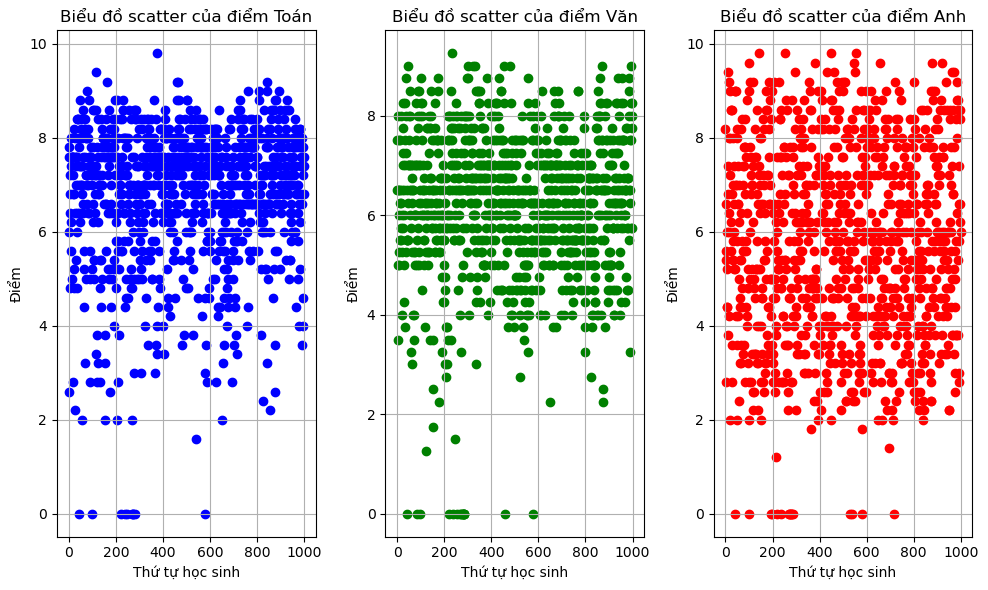

In [6]:

# Thiết lập kích thước và hình dạng của biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ scatter cho điểm Toán
plt.subplot(1, 3, 1)
plt.scatter(range(len(df)), df['Điểm Toán'], color='blue', marker='o')
plt.title('Biểu đồ scatter của điểm Toán')
plt.xlabel('Thứ tự học sinh')
plt.ylabel('Điểm')
plt.grid(True)

# Biểu đồ scatter cho điểm Văn
plt.subplot(1, 3, 2)
plt.scatter(range(len(df)), df['Điểm Văn'], color='green', marker='o')
plt.title('Biểu đồ scatter của điểm Văn')
plt.xlabel('Thứ tự học sinh')
plt.ylabel('Điểm')
plt.grid(True)

# Biểu đồ scatter cho điểm Anh
plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df['Điểm Anh'], color='red', marker='o')
plt.title('Biểu đồ scatter của điểm Anh')
plt.xlabel('Thứ tự học sinh')
plt.ylabel('Điểm')
plt.grid(True)

plt.tight_layout()  # Để tránh trùng lấn giữa các biểu đồ
plt.show()


## 3.2 Dân số và mật độ dân số [2018 - 2022]

In [7]:

popu_path = r"..\DATA\RAW DATA\Dân số và mật độ dân số [2018-2022]\Population_of_provinces.csv"
# Đọc dữ liệu từ file CSV
data_pop = pd.read_csv(popu_path, encoding='utf-8', thousands=',')  # Đặt tên file CSV thực tế của bạn

# Hiển thị thông tin về dữ liệu
print(data_pop.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Địa phương                            63 non-null     object
 1   Dân số trung bình (Nghìn người) 2018  63 non-null     object
 2   Mật độ dân số (Người/km2) 2018        63 non-null     object
 3   Dân số trung bình (Nghìn người) 2019  63 non-null     object
 4   Mật độ dân số (Người/km2) 2019        63 non-null     object
 5   Dân số trung bình (Nghìn người) 2020  63 non-null     object
 6   Mật độ dân số (Người/km2) 2020        63 non-null     object
 7   Dân số trung bình (Nghìn người) 2021  63 non-null     object
 8   Mật độ dân số (Người/km2) 2021        63 non-null     object
 9   Dân số trung bình (Nghìn người) 2022  63 non-null     object
 10  Mật độ dân số (Người/km2) 2022        63 non-null     object
dtypes: object(11)
memory usage: 5.5+ K

### Mật độ dân số

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming data_pop is your DataFrame
data_pop = pd.read_csv(popu_path, encoding='utf-8', thousands=',')  # Đặt tên file CSV thực tế của bạn

# Convert data types from string to float
for column in data_pop.columns[1:]:
    data_pop[column] = data_pop[column].str.replace('.', '').str.replace(',', '.').astype(float)

# Create a colormap to use different colors for each year
colors = cm.tab10.colors

# Plot bar charts for each year from 2018 to 2022
fig, axs = plt.subplots(5, 1, figsize=(15, 40), sharex=True)
for i, year in enumerate(range(2018, 2023)):
    ax = axs[i]
    ax.set_title(f'Mật độ dân số năm {year}')
    ax.set_yticks(range(0, int(data_pop[f'Mật độ dân số (Người/km2) {year}'].max()) + 1, 100))
    for index, row in data_pop.iterrows():
        population_density = row[f'Mật độ dân số (Người/km2) {year}']
        ax.bar(row['Địa phương'], population_density, color=colors[i], label=row['Địa phương'])

# Add a legend for the years
legend_colors = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
fig.legend(legend_colors, [str(year) for year in range(2018, 2023)], title='Năm', loc='upper right')

# Format the plot
plt.xlabel('Địa phương')
plt.ylabel('Mật độ dân số (Người/km2)')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


### DÂN SỐ TRUNG BÌNH

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming data_pop is your DataFrame
data_pop = pd.read_csv(popu_path, encoding='utf-8', thousands=',')  # Đặt tên file CSV thực tế của bạn

# Convert data types from string to float
for column in data_pop.columns[1:]:
    data_pop[column] = data_pop[column].str.replace('.', '').str.replace(',', '.').astype(float)

# Create a colormap to use different colors for each year
colors = cm.tab10.colors

# Plot bar charts for each year from 2018 to 2022
fig, axs = plt.subplots(5, 1, figsize=(15, 40), sharex=True)
for i, year in enumerate(range(2018, 2023)):
    ax = axs[i]
    ax.set_title(f'Dân số trung bình (Nghìn người) {year}')
    ax.set_yticks(range(0, int(data_pop[f'Dân số trung bình (Nghìn người) {year}'].max()) + 1, 200))
    for index, row in data_pop.iterrows():
        population_density = row[f'Dân số trung bình (Nghìn người) {year}']
        ax.bar(row['Địa phương'], population_density, color=colors[i], label=row['Địa phương'])

# Add a legend for the years
legend_colors = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
fig.legend(legend_colors, [str(year) for year in range(2018, 2023)], title='Năm', loc='upper right')

# Format the plot
plt.xlabel('Địa phương')
plt.ylabel('Mật độ dân số (Người/km2)')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


## 3.3 Đầu tư giáo dục [2018 - 2022]

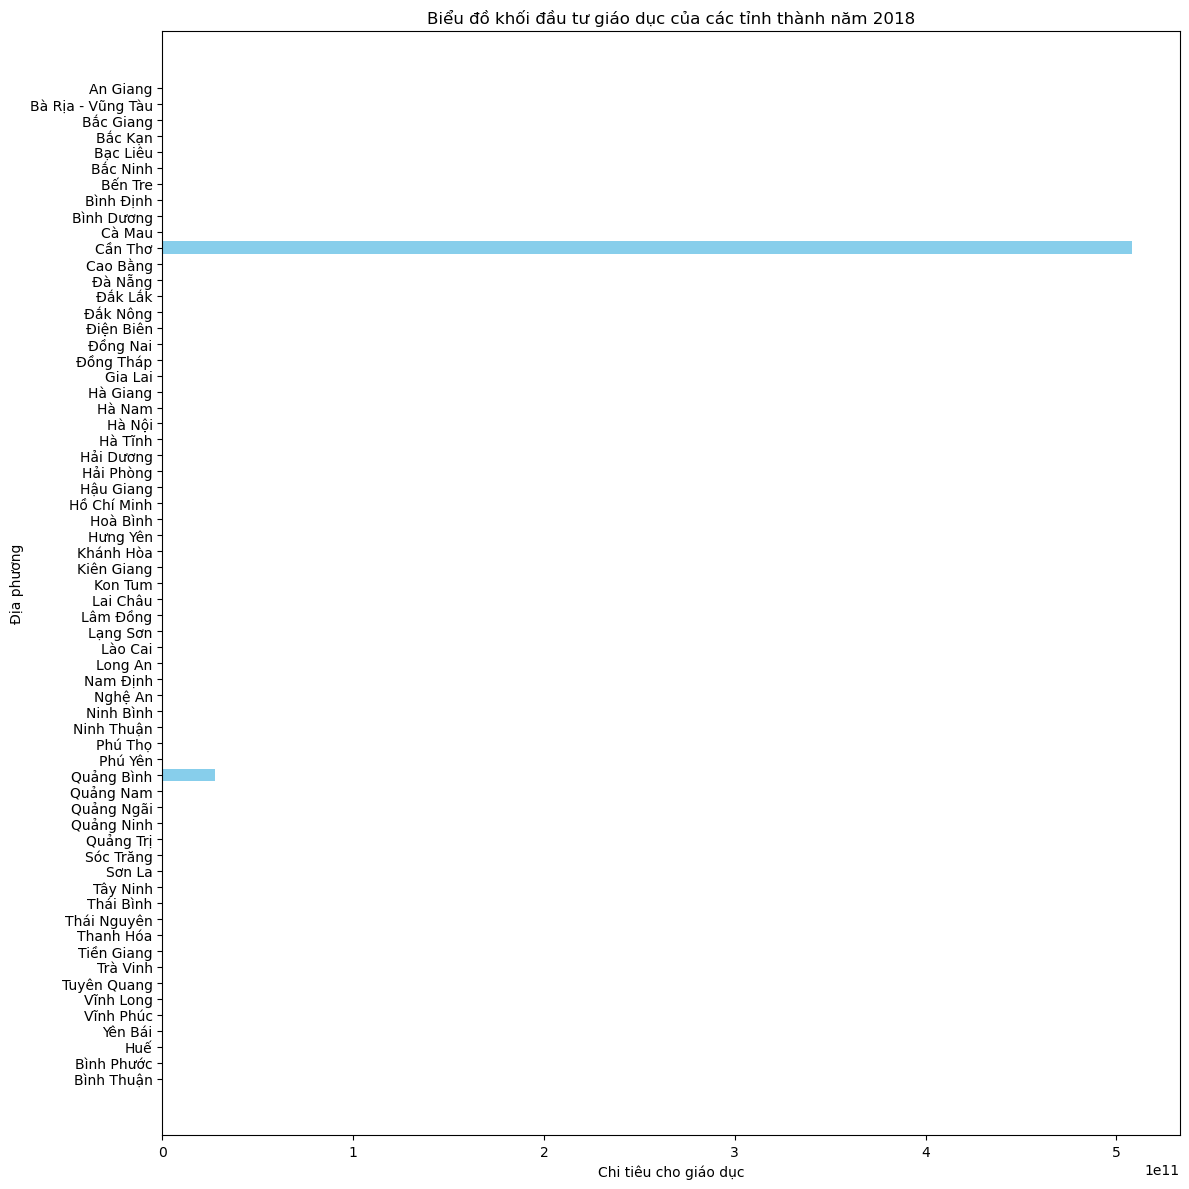

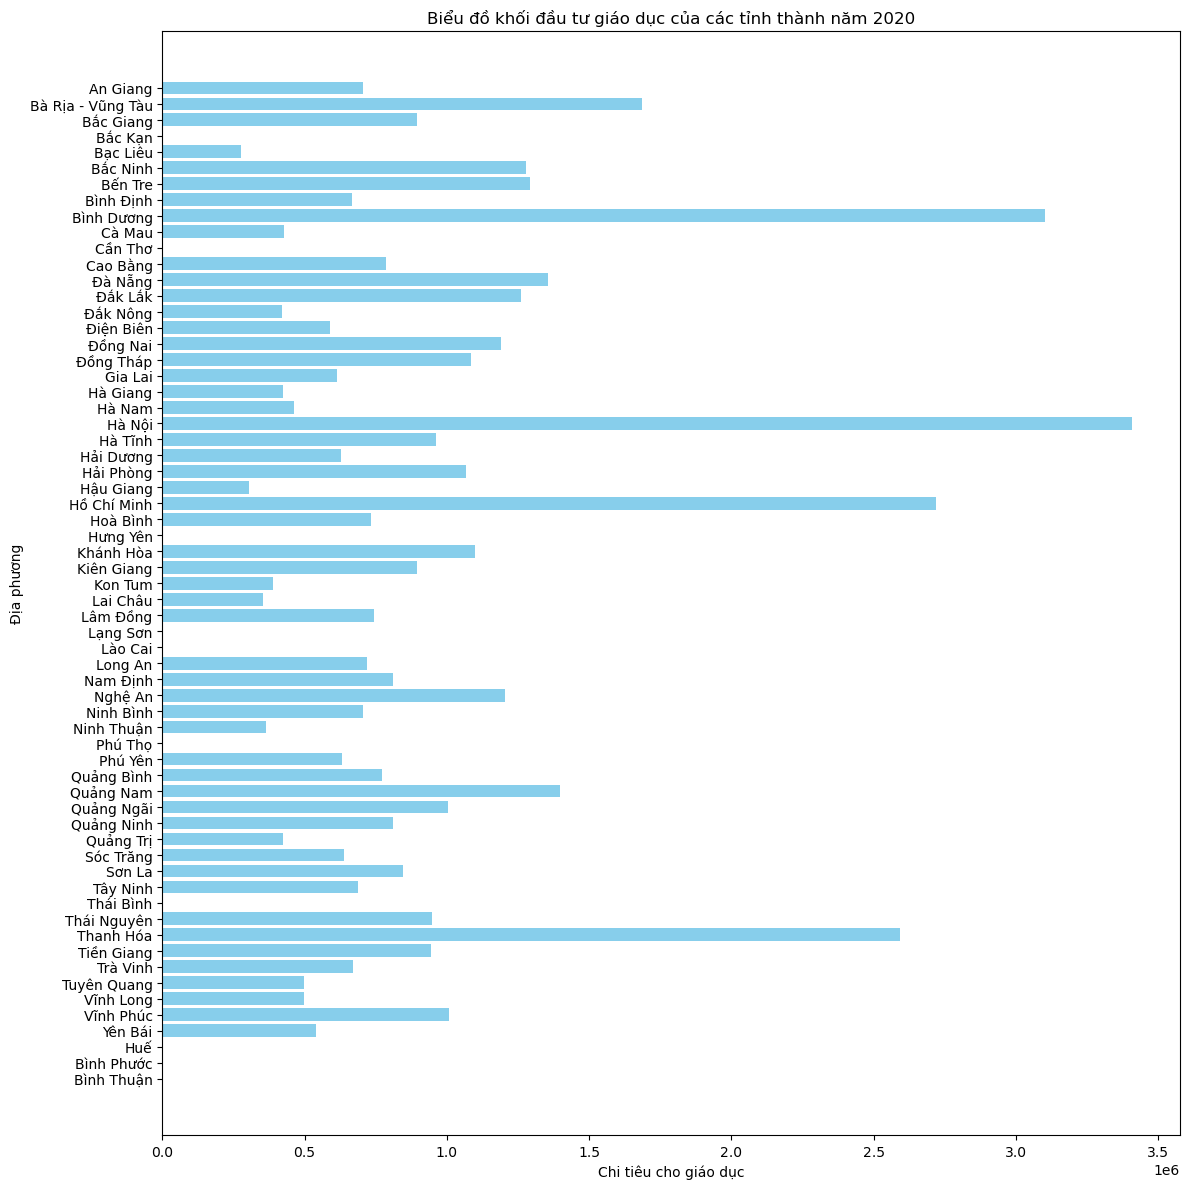

In [10]:

# Đọc dữ liệu từ file CSV
edu_invest = r"..\DATA\RAW DATA\Đầu tư giáo dục [2018-2023]\education.csv"
data_education_investment = pd.read_csv(edu_invest)



# Chuyển đổi các giá trị "-" thành 0 và chuyển cột "Chi tiêu cho giáo dục" từ chuỗi sang số
data_education_investment['Chi tiêu cho giáo dục'] = data_education_investment['Chi tiêu cho giáo dục'].replace('-', '0').str.replace('.', '').astype(float)

# Tạo danh sách các năm từ 2018 đến 2022
years = range(2018, 2023)

# Tạo 5 biểu đồ khối cho mỗi năm từ 2018 đến 2022
for year in years:
    # Lọc dữ liệu cho năm cụ thể
    year_data = data_education_investment[data_education_investment['Năm'] == year]
    
    # Tạo biểu đồ khối
    plt.figure(figsize=(12, 12))
    plt.barh(year_data['Địa phương'], year_data['Chi tiêu cho giáo dục'], color='skyblue')
    plt.xlabel('Chi tiêu cho giáo dục')
    plt.ylabel('Địa phương')
    plt.title(f'Biểu đồ khối đầu tư giáo dục của các tỉnh thành năm {year}')
    plt.gca().invert_yaxis()  # Đảo ngược trục y để hiển thị tỉnh thành trên đầu
    plt.tight_layout()
    plt.show()



## 3.4 Chỉ số giáo dục [2018 - 2020]

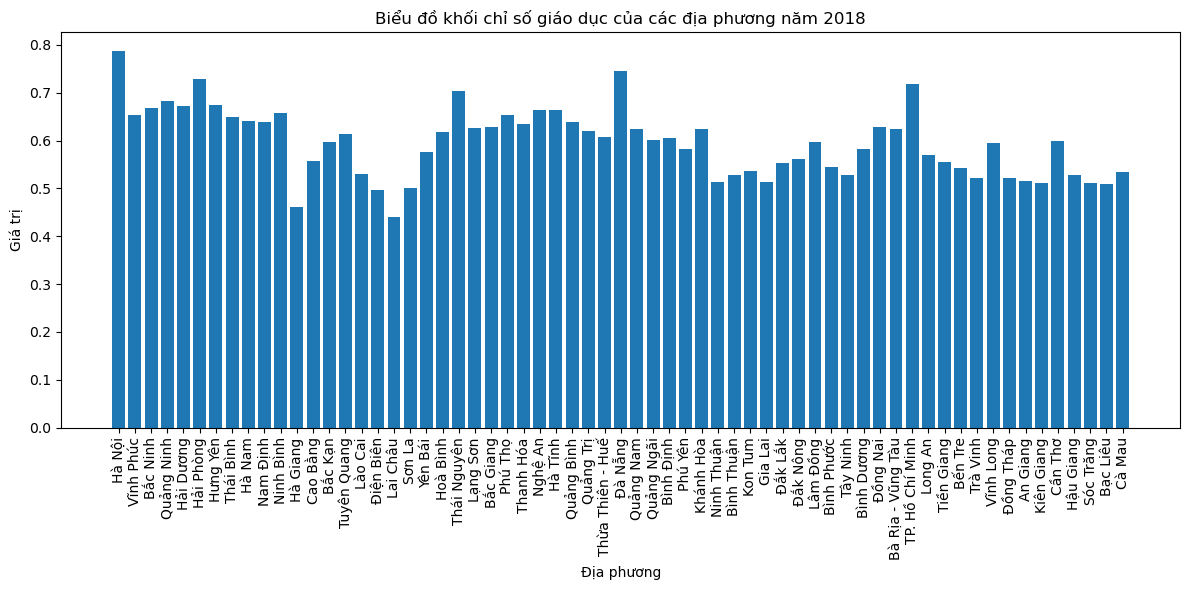

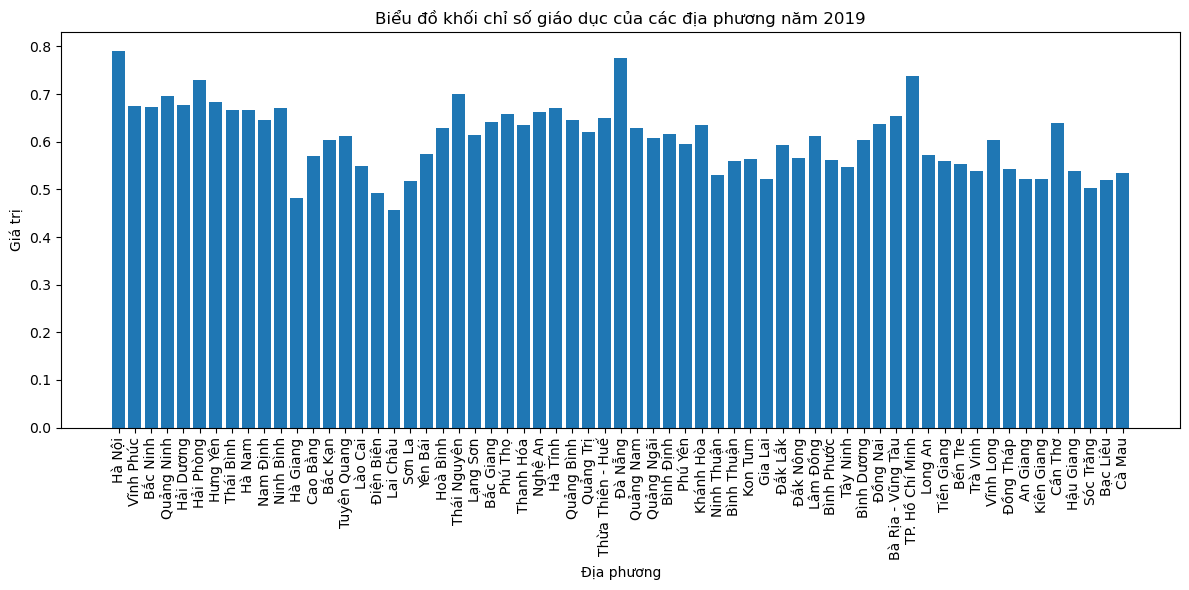

In [15]:

education_numeric_path = r"..\DATA\RAW DATA\Chỉ số giáo dục [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 12. Chỉ số giáo dục của cả nước và các địa phương giai đoạn 2018 - 2020.csv"
data_education_numeric = pd.read_csv(education_numeric_path)


for column in data_education_numeric.columns[1:]:
    data_education_numeric[column] = data_education_numeric[column].str.replace(',', '.').astype(float)

# Tạo danh sách các năm từ 2018 đến 2020
years = range(2018, 2021)

# Tạo 3 biểu đồ khối cho mỗi năm từ 2018 đến 2020
for year in years:
    # Lọc dữ liệu cho năm cụ thể
    year_data = data_education_numeric[['Địa phương', str(year)]]
    
    # Tạo biểu đồ khối
    plt.figure(figsize=(12, 6))
    plt.bar(year_data['Địa phương'], year_data[str(year)])
    plt.xlabel('Địa phương')
    plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ khối chỉ số giáo dục của các địa phương năm {year}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## 3.5 Chỉ số sức khỏe [2018 - 2020]

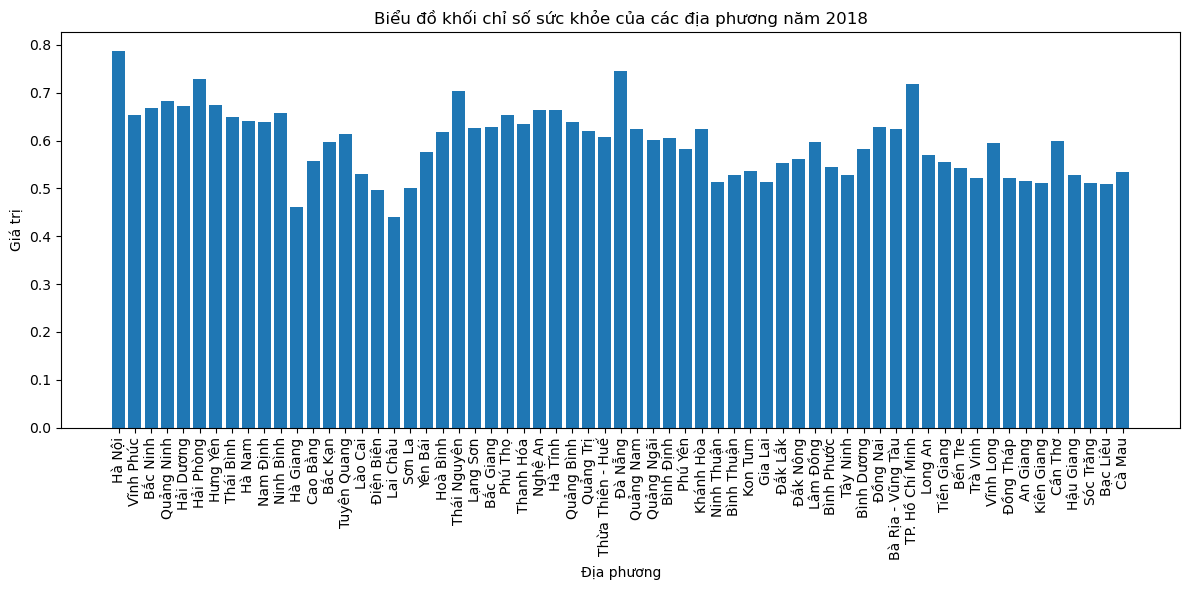

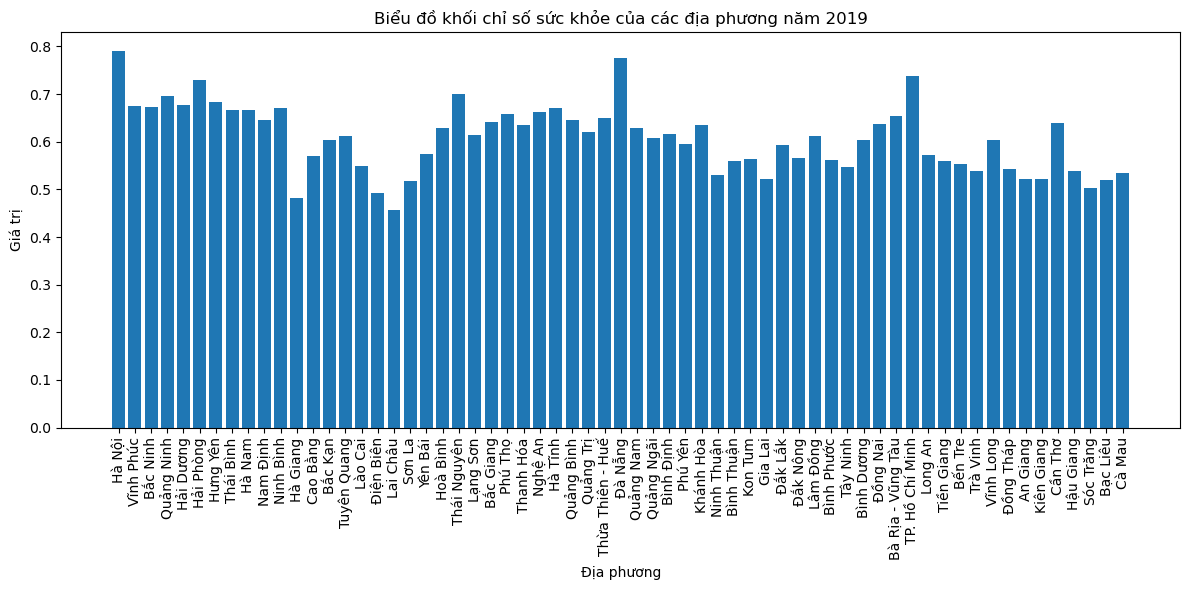

In [17]:

health_numeric_path = r"..\C:\Users\Phat\OneDrive - The University of Technology\Desktop\HK6\KHDL\MiniProjectDatasciene\DATA\RAW DATA\Chỉ số sức khỏe [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 6. Chỉ số sức khỏe của cả nước và các địa phương giai đoạn 2018 - 2020.csv"
data_health_numeric = pd.read_csv(education_numeric_path)


for column in data_health_numeric.columns[1:]:
    data_health_numeric[column] = data_health_numeric[column].str.replace(',', '.').astype(float)

# Tạo danh sách các năm từ 2018 đến 2020
years = range(2018, 2021)

# Tạo 3 biểu đồ khối cho mỗi năm từ 2018 đến 2020
for year in years:
    # Lọc dữ liệu cho năm cụ thể
    year_data = data_health_numeric[['Địa phương', str(year)]]
    
    # Tạo biểu đồ khối
    plt.figure(figsize=(12, 6))
    plt.bar(year_data['Địa phương'], year_data[str(year)])
    plt.xlabel('Địa phương')
    plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ khối chỉ số sức khỏe của các địa phương năm {year}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## 3.6 Chỉ số thu nhập [2018 - 2020]

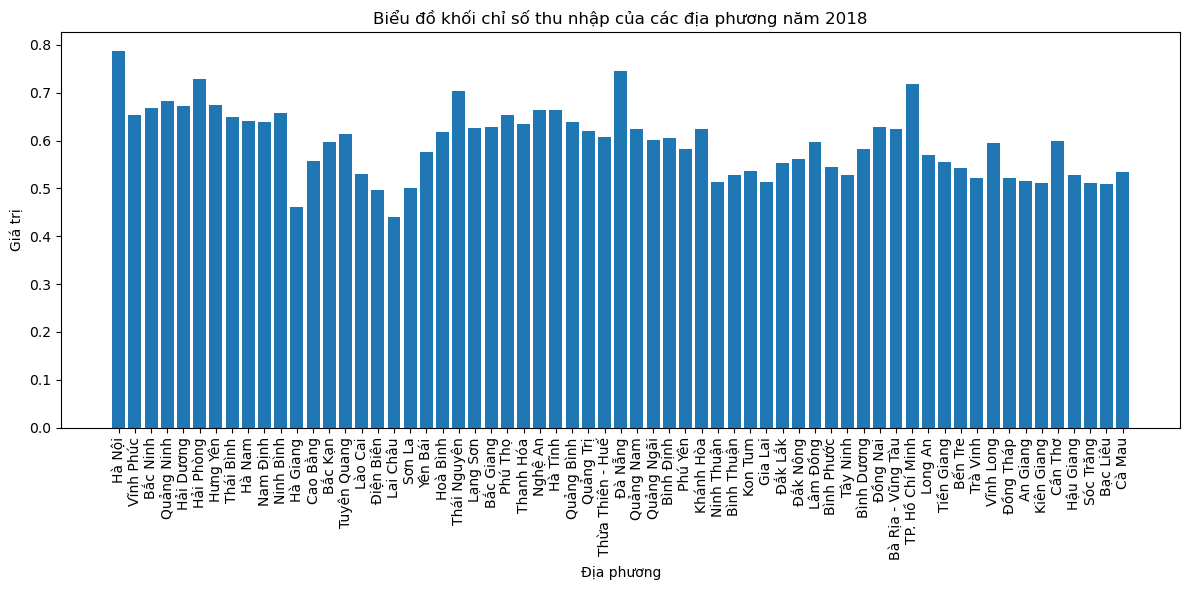

In [19]:


income_numeric_path = r"..\DATA\RAW DATA\Chỉ số thu nhập [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 16. Chỉ số thu nhập của cả nước và các địa phương giai đoạn 2018 - 2020.csv"
data_income_numeric = pd.read_csv(education_numeric_path)


for column in data_income_numeric.columns[1:]:
    data_income_numeric[column] = data_income_numeric[column].str.replace(',', '.').astype(float)

# Tạo danh sách các năm từ 2018 đến 2020
years = range(2018, 2021)

# Tạo 3 biểu đồ khối cho mỗi năm từ 2018 đến 2020
for year in years:
    # Lọc dữ liệu cho năm cụ thể
    year_data = data_income_numeric[['Địa phương', str(year)]]
    
    # Tạo biểu đồ khối
    plt.figure(figsize=(12, 6))
    plt.bar(year_data['Địa phương'], year_data[str(year)])
    plt.xlabel('Địa phương')
    plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ khối chỉ số thu nhập của các địa phương năm {year}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## 3.7 Chỉ số phát triển con người [[2018 - 2020]]

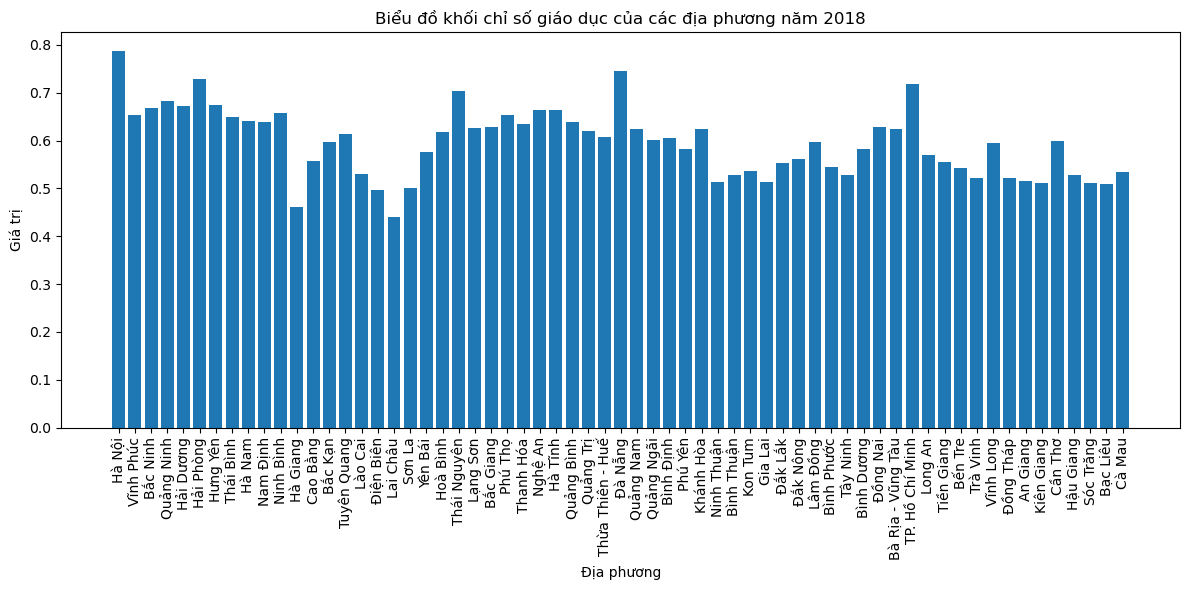

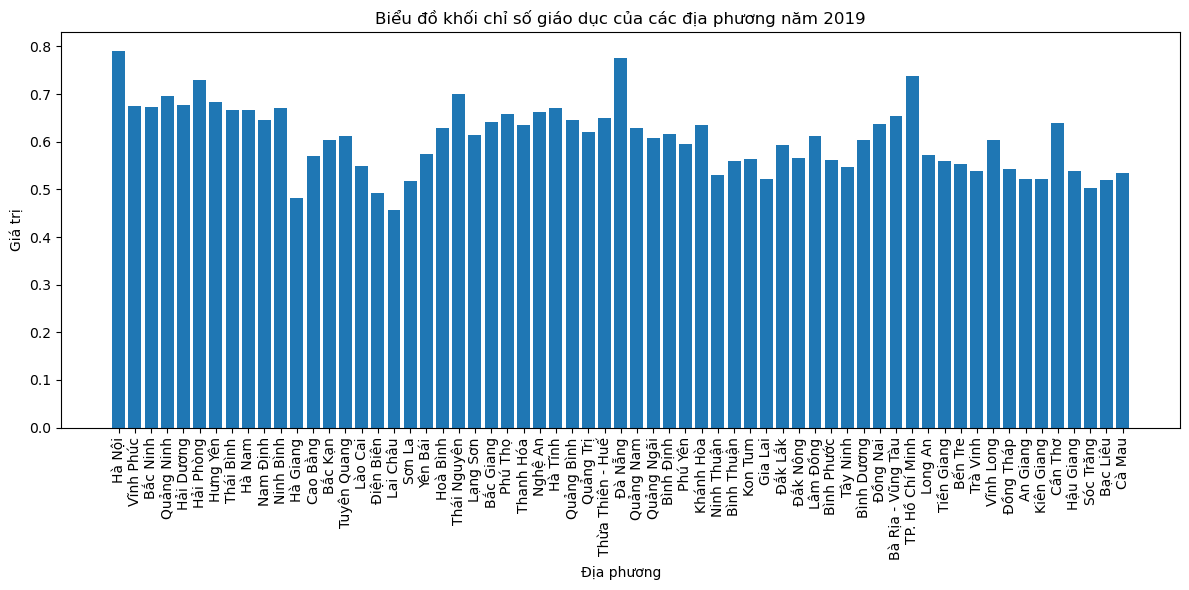

In [22]:

development_numeric_path = r"..\DATA\RAW DATA\Chỉ số phát triển con người [2018-2020]\Thống kê chỉ số giai đoạn 2018 - 2020 - 1. Chỉ số phát triển con người của cả nước và các địa phương giai đoạn 2018 - 2020.csv"
data_development_numeric = pd.read_csv(education_numeric_path)


for column in data_education_numeric.columns[1:]:
    data_development_numeric[column] = data_development_numeric[column].str.replace(',', '.').astype(float)

# Tạo danh sách các năm từ 2018 đến 2020
years = range(2018, 2021)

# Tạo 3 biểu đồ khối cho mỗi năm từ 2018 đến 2020
for year in years:
    # Lọc dữ liệu cho năm cụ thể
    year_data = data_development_numeric[['Địa phương', str(year)]]
    
    # Tạo biểu đồ khối
    plt.figure(figsize=(12, 6))
    plt.bar(year_data['Địa phương'], year_data[str(year)])
    plt.xlabel('Địa phương')
    plt.ylabel('Giá trị')
    plt.title(f'Biểu đồ khối chỉ số giáo dục của các địa phương năm {year}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
